# Week 5, Data science in Neuroscience


## Plan for this week

1. Introduction to pytorch
2. Tensors
3. Train a linear model with pytorch
4. Train a simple neural network with pytorch
5. A convolutional network to process images (second session)

***
## pytorch installation

You will need to install the pytorch library to run the content of this notebook. There are instructions for installing pytorch on Windows computers [here](https://github.com/kevin-allen/dataScienceNeuro/blob/main/installation.md)

Alternatively, you could use Google Colab to run the notebook. You will need to follow the instructions [here](https://github.com/kevin-allen/dataScienceNeuro/blob/main/colab.md) to load data files from Google Colab.  

*** 
## Deep neural networks

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.


<div>
<img src="../images/deep-neural-network.png" width="500"/>
</div>




***
## Artificial neuron

A **neuron** is the building block of the neural network.


They do 3 things: 
* A linear transofrmation of the inputs
* Adding a constant 
* Applying a fixed nonlinear function (activation fucntion)
    
The input can be a single value or a vector. The output can be a single value or a vector.
***
### Linear model 

<img src="../images/neuron_linear.png" width="500" align="center">

***

### Artificial neuron



<img src="../images/artificial_neuron.png" width="500" align="center">

***
<div>
<img src="../images/pytorch.png" width="400"/>
</div>

Pytorch is a Python library that facilitates building deep learning projects

* Store data into Tensors (multidimensional arrays that are similar to NumPy arrays)
* Allows fast calculations on dedicated hardware (GPUs)
* Ability of tensors to keep track of the operations performed on them and to analytically compute derivatives
* Classes to deal with datasets
* Classes to simplify building deep neural networks

# Tensors

pytorch tensors are very similar to NumPy arrays. They have 2 main advantages

* Used to do calculations on a GPU
* Can keep track of the graph of computations that created them (used to calculate derivatives) 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Creating tensors

In [2]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [3]:
torch.zeros(3,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [4]:
a = torch.tensor([[1.0,2],[3,4]])
a

tensor([[1., 2.],
        [3., 4.]])

You can interrogate a tensor just like a NumPy array.

In [5]:
print("shape:", a.shape)
print("ndim:", a.ndim)
print("dtype:", a.dtype)

shape: torch.Size([2, 2])
ndim: 2
dtype: torch.float32


You can generate random numbers with `torch.rand()`. You can change the shape of an array with `.reshape()`. Many of the mathematical functions of NumPy have a torch equivalent.

In [6]:
b = torch.rand(24).reshape(4,6)
b

tensor([[0.8615, 0.8704, 0.3143, 0.6893, 0.1291, 0.2713],
        [0.7148, 0.2821, 0.7425, 0.7801, 0.6649, 0.9095],
        [0.2388, 0.8167, 0.6760, 0.3611, 0.9670, 0.0257],
        [0.4495, 0.3773, 0.6171, 0.9879, 0.1376, 0.6353]])

In [7]:
b.shape

torch.Size([4, 6])

In [8]:
b.mean()

tensor(0.5633)

In [9]:
b.mean(axis=0)

tensor([0.5661, 0.5866, 0.5875, 0.7046, 0.4747, 0.4604])

We can add an extra dimension with a size of 1 using `.unsqueeze()`.

In [10]:
b.shape

torch.Size([4, 6])

In [11]:
b.unsqueeze(0).shape

torch.Size([1, 4, 6])

We can do broadcasting, just like with NumPy arrays.

```
When operating on two arrays, pytorch compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
​
* they are equal, or
* one of them is 1
```


In [12]:
b.shape

torch.Size([4, 6])

In [13]:
a = torch.ones(4)
a.shape

torch.Size([4])

In [14]:
#b+a

We can add a dimension of size 1 with `.unsqeeze()`

In [15]:
A = a.unsqueeze(1)
A.shape

torch.Size([4, 1])

In [16]:
b+A

tensor([[1.8615, 1.8704, 1.3143, 1.6893, 1.1291, 1.2713],
        [1.7148, 1.2821, 1.7425, 1.7801, 1.6649, 1.9095],
        [1.2388, 1.8167, 1.6760, 1.3611, 1.9670, 1.0257],
        [1.4495, 1.3773, 1.6171, 1.9879, 1.1376, 1.6353]])

We can get rid of a dimension of size 1 with `.squeeze()`

In [17]:
A.shape, A.squeeze().shape

(torch.Size([4, 1]), torch.Size([4]))

We can change the order of the dimensions in a tensor with `.permute()`

In [18]:
b.shape

torch.Size([4, 6])

In [19]:
b = torch.rand(3*24).reshape(3,4,6)
b

tensor([[[0.3749, 0.2382, 0.7115, 0.1651, 0.8514, 0.6588],
         [0.5166, 0.6645, 0.9911, 0.5972, 0.6747, 0.0845],
         [0.2028, 0.2798, 0.1441, 0.8978, 0.5966, 0.5694],
         [0.7438, 0.8249, 0.9319, 0.2334, 0.2529, 0.1970]],

        [[0.1358, 0.8148, 0.9795, 0.7974, 0.0663, 0.4012],
         [0.9539, 0.1838, 0.4227, 0.8543, 0.8785, 0.2983],
         [0.7561, 0.8826, 0.8599, 0.3892, 0.5339, 0.6088],
         [0.8039, 0.6745, 0.2263, 0.7657, 0.1120, 0.6149]],

        [[0.0988, 0.0793, 0.8158, 0.4831, 0.0442, 0.1396],
         [0.6698, 0.9557, 0.3365, 0.7700, 0.4920, 0.7176],
         [0.8363, 0.6228, 0.7558, 0.0449, 0.6216, 0.7727],
         [0.6237, 0.7748, 0.0631, 0.5621, 0.0601, 0.8634]]])

In [20]:
b.shape

torch.Size([3, 4, 6])

In [21]:
b = b.permute(1,2,0)
b.shape

torch.Size([4, 6, 3])

### Moving tensors to the GPU

Once you moved your tensors to the GPU, calculations on these tensors will be performed on the GPU. 

In [22]:
b = torch.rand(10)
b

tensor([0.7656, 0.5434, 0.6116, 0.2085, 0.9861, 0.0793, 0.2947, 0.9689, 0.7656,
        0.4229])

In [23]:
torch.cuda.is_available()

False

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cpu



In [25]:
b

tensor([0.7656, 0.5434, 0.6116, 0.2085, 0.9861, 0.0793, 0.2947, 0.9689, 0.7656,
        0.4229])

In [26]:
b = b.to(device)

In [27]:
b

tensor([0.7656, 0.5434, 0.6116, 0.2085, 0.9861, 0.0793, 0.2947, 0.9689, 0.7656,
        0.4229])

In [28]:
b = b.to("cpu")
b

tensor([0.7656, 0.5434, 0.6116, 0.2085, 0.9861, 0.0793, 0.2947, 0.9689, 0.7656,
        0.4229])

In [29]:
#b = b.to("cuda")
#b

## From pytorch tensors to NumPy arrays and back

You can go between tensors and NumPy arrays using `torch.from_numpy()` and `myTensor.numpy()`

In [30]:
points_pt = torch.tensor([2,3,4])
print(type(points_pt))
points_np = points_pt.numpy()
print(type(points_np))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [31]:
a = np.array([1,2,3,4])
torch.from_numpy(a)

tensor([1, 2, 3, 4])

***
# Training a linear model using pytorch

We will recreate our machine learning example of week 2 using pytorch.

We want to predict the firing rate of a neuron from the running speed of the animal.


In [34]:
fn = "../data/animal_speed.npy"

In [35]:
speed = np.load(fn)
speed = speed[0:100]

In [36]:
w = 1.25 # weight (slope)
b = 10 # bias (intercept)
np.random.seed(0)
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

rate = speed* w + b + e # simulate the firing rate
rate = np.maximum(0, rate) # eliminate the negative firing rates

Text(0, 0.5, 'Firing rate (Hz)')

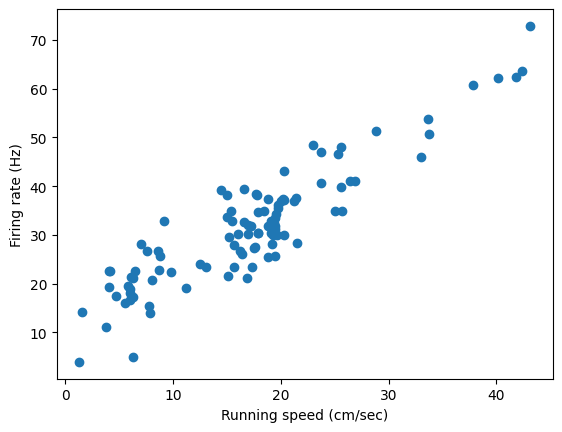

In [37]:
plt.scatter(speed,rate)
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")

### Create a model with pytorch

We will recreate our **linear regression model** using pytorch. 


$yhat = b+ w*X$


<img src="../images/neuron_linear.png" width="500" align="center">

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

This is **not a neural network**, but a linear model.

In [41]:
import torch.nn as nn

class Lin_model(nn.Module):
    """
    Class to create pytorch model.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.linLayer = nn.Linear(in_features=1, out_features=1, bias=True)
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.linLayer(x)
        return out

We define our model using a class that inherits from `nn.Module`.

We will use a similar class definition for more complex models.

In [42]:
lin_model = Lin_model() # create model from our class definition

The parameters of the models are created automatically when creating the model.

We can use this for loop to print the parameters.

In [43]:
for name,p in lin_model.named_parameters():
    print(name, p)

linLayer.weight Parameter containing:
tensor([[-0.4776]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.2946], requires_grad=True)


In [44]:
print("Number of parameters:", sum(p.numel() for p in lin_model.parameters()))

Number of parameters: 2


### Loss function

pytorch has built-in loss functions that we can use in our training loop. We will use the mean squared error (MSE).

In [45]:
# loss function returning MSE
loss_fn = torch.nn.MSELoss()

### pytorch optimizers

Optimizers are used to change our model parameters during learning.

There are several optimization strategies and tricks that can improve learning. 

There are more important when building deep neural networks than for linear regression models.

Let's see how to use the SGD optimizer.

In [46]:
import torch.optim as optim

In [47]:
learning_rate = 0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)

## Data format for our model

* X: input data
* y: labels or values that we want to predict


We need to store them in `tensors`.

X: Input data, the first dimension (rows) is for the observations. The second dimension is for features. We only have 1 input feature (speed), so the second dimension will have a size of 1.

y: The first dimension (rows) is for the observations. The second is for the output features. In this case, we have one output feature (firing rate)

In [50]:
X = torch.from_numpy(speed).unsqueeze(1).float()

In [51]:
X.shape

torch.Size([100, 1])

In [52]:
y = torch.from_numpy(rate).unsqueeze(1).float()
y.shape

torch.Size([100, 1])

### One forward pass 

We now all our needed element to train our model.

Before using our training loop, it is a good idea to run one forward pass outside of the for loop to identify potential problems.

We run all the steps that will be in our training loop.

In [53]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[-0.4776]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.2946], requires_grad=True)


In [54]:
yhat = lin_model(X)

In [55]:
loss =  loss_fn(yhat,y)

In [56]:
optimizer.zero_grad() # zero the gradients

In [57]:
loss.backward() # calculate gradients

In [58]:
optimizer.step() # will change the model parameters to reduce the loss        

In [59]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[1.1727]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.2143], requires_grad=True)


### Training loop

We want a generic training loop that will work in most situations.

In [60]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, optimizer, loss_fn, model, X,y):
    for epoch in range (n_epochs):
        
        yhat = model(X) # make predictions
        loss = loss_fn(yhat,y) # calculate the loss
        optimizer.zero_grad() # zero the gradients of our model's parameters
        loss.backward() # calculate gradients of the model's parameters
        optimizer.step() # will change the model parameters to reduce the loss
        
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return

In [61]:
training_loop(n_epochs = 20000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 165.7705535888672
Epoch: 1, Loss: 57.76408386230469
Epoch: 2, Loss: 50.9151725769043
Epoch: 3, Loss: 50.461814880371094
Epoch: 4, Loss: 50.412818908691406
Epoch: 5, Loss: 50.389408111572266
Epoch: 6, Loss: 50.36763000488281
Epoch: 7, Loss: 50.345977783203125
Epoch: 8, Loss: 50.324344635009766
Epoch: 9, Loss: 50.302734375
Epoch: 1000, Loss: 35.93682861328125
Epoch: 2000, Loss: 29.815380096435547
Epoch: 3000, Loss: 27.241933822631836
Epoch: 4000, Loss: 26.16006088256836
Epoch: 5000, Loss: 25.705245971679688
Epoch: 6000, Loss: 25.514047622680664
Epoch: 7000, Loss: 25.43366050720215
Epoch: 8000, Loss: 25.399869918823242
Epoch: 9000, Loss: 25.385662078857422
Epoch: 10000, Loss: 25.379690170288086
Epoch: 11000, Loss: 25.377180099487305
Epoch: 12000, Loss: 25.37612533569336
Epoch: 13000, Loss: 25.375680923461914
Epoch: 14000, Loss: 25.3754940032959
Epoch: 15000, Loss: 25.375415802001953
Epoch: 16000, Loss: 25.375385284423828
Epoch: 17000, Loss: 25.375368118286133
Epoch: 18000,

In [62]:
for p in lin_model.parameters():
    print(p)

Parameter containing:
tensor([[1.2343]], requires_grad=True)
Parameter containing:
tensor([10.5677], requires_grad=True)


In [63]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [64]:
lin_yhat = lin_model(t_range)

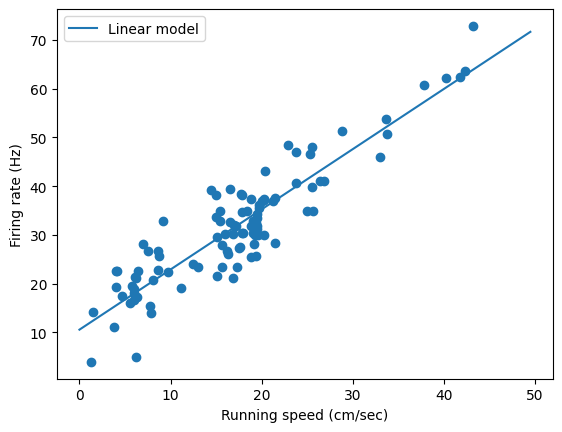

In [65]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

We found the parameters that were used to simulate the data.

# A first neural network

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.



***

* A neuron in a neural network has one more non-linear function. 

<img src="../images/artificial_neuron.png" width="500" align="center">

The non-linear function allows the model to have different slope at different values.

The non-linear function of the neuron is called the **activation function**.

Text(0.5, 1.0, 'Non-linear model: tanh(w*x+b)')

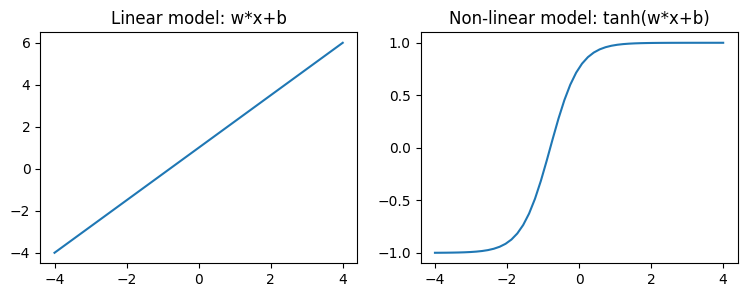

In [66]:
nrow=1
ncol=2
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3))

XX = np.linspace(-4,4) # input
          
w=1.25
b=1.0
                
ax[0].plot(XX,w*XX+b)
ax[0].set_title("Linear model: w*x+b")

ax[1].plot(XX,np.tanh(w*XX+b))
ax[1].set_title("Non-linear model: tanh(w*x+b)")

In neural network, we have **several artificial neurons**. 

The output of several neurons is summed to get the output.

Let's build a neural network to predict the firing rate from the speed of the animal.

In [67]:
class NN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=5, bias=True)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=5, out_features=1, bias=True)
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.layer1(x)
        out = self.tanh(out)
        out = self.layer2(out)
        return out

In [72]:
nn_model = NN_model()

In [73]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.3742],
        [-0.3470],
        [ 0.5103],
        [ 0.6522],
        [-0.7191]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.5117, -0.4548,  0.9589, -0.3923, -0.9217], requires_grad=True)
layer2.weight Parameter containing:
tensor([[-0.1985,  0.3503, -0.2229,  0.3026, -0.2097]], requires_grad=True)
layer2.bias Parameter containing:
tensor([0.0303], requires_grad=True)


In [74]:
print("Number of parameters:", sum(p.numel() for p in nn_model.parameters()))

Number of parameters: 16


In [75]:
learning_rate=0.0001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)

In [76]:
training_loop(n_epochs = 30000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 1166.4844970703125
Epoch: 1, Loss: 1164.0635986328125
Epoch: 2, Loss: 1161.6485595703125
Epoch: 3, Loss: 1159.2391357421875
Epoch: 4, Loss: 1156.83544921875
Epoch: 5, Loss: 1154.4375
Epoch: 6, Loss: 1152.0450439453125
Epoch: 7, Loss: 1149.6583251953125
Epoch: 8, Loss: 1147.2772216796875
Epoch: 9, Loss: 1144.90185546875
Epoch: 1000, Loss: 236.41864013671875
Epoch: 2000, Loss: 120.55307006835938
Epoch: 3000, Loss: 86.49163818359375
Epoch: 4000, Loss: 72.1728744506836
Epoch: 5000, Loss: 62.96990203857422
Epoch: 6000, Loss: 61.4582633972168
Epoch: 7000, Loss: 66.37471771240234
Epoch: 8000, Loss: 51.226505279541016
Epoch: 9000, Loss: 57.774269104003906
Epoch: 10000, Loss: 52.80015563964844
Epoch: 11000, Loss: 45.44597625732422
Epoch: 12000, Loss: 42.01533126831055
Epoch: 13000, Loss: 39.73512268066406
Epoch: 14000, Loss: 38.00547409057617
Epoch: 15000, Loss: 36.622344970703125
Epoch: 16000, Loss: 35.482730865478516
Epoch: 17000, Loss: 34.52430725097656
Epoch: 18000, Loss: 33

In [117]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 1.6094],
        [ 0.4983],
        [-1.4511],
        [-0.7066],
        [ 1.1543],
        [-0.7170],
        [ 0.2753],
        [-0.8875],
        [-0.6896],
        [ 0.2208],
        [ 0.9279],
        [ 0.7702],
        [ 0.9320],
        [-0.0804],
        [ 0.4510]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.9970,  0.7691,  0.8111, -0.0620, -0.2669,  3.9154, -2.3539,  2.7501,
        -0.8907,  0.8348, -0.0885,  0.8817, -6.1368, -0.6802, -4.0225],
       requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 1.4157, -0.4246, -1.1657, -0.3523,  0.6784, -2.7253, -2.6586,  5.3789,
          0.4046, -0.6283,  0.1844, -0.3240,  4.4882,  1.0189, -4.0112]],
       requires_grad=True)
layer2.bias Parameter containing:
tensor([-0.8706], requires_grad=True)


### Let's compare our linear model with our small neural network

In [78]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [79]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

To plot the `yhat` tensors, we need to call `.detach()` because the tensor have associated gradients.

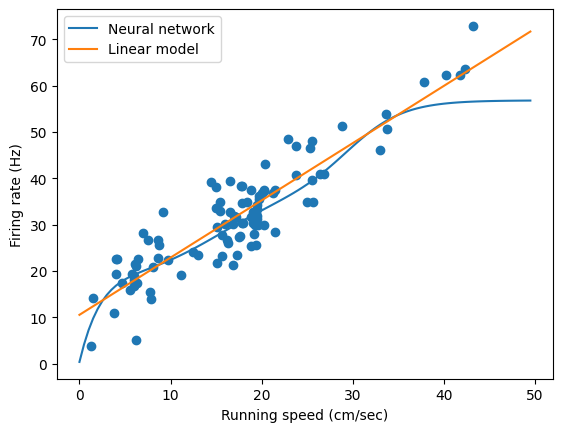

In [80]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

### Neural networks can model all sorts of functions

Let's try our two models on some non-linear problems

In [83]:
X = torch.arange(0,10,0.1).unsqueeze(1)
print(X.shape)
y = torch.sin(X)*4 + torch.randn(100, 1)

torch.Size([100, 1])


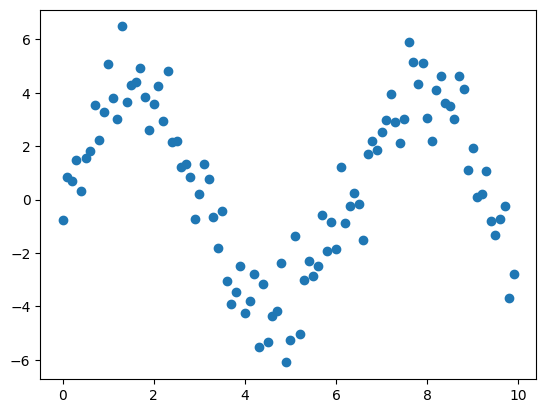

In [84]:
plt.scatter(X.numpy(),y.numpy())

In [85]:
learning_rate=0.001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 286.97332763671875
Epoch: 1, Loss: 58.58380889892578
Epoch: 2, Loss: 13.921805381774902
Epoch: 3, Loss: 13.496761322021484
Epoch: 4, Loss: 13.11035442352295
Epoch: 5, Loss: 12.756702423095703
Epoch: 6, Loss: 12.431224822998047
Epoch: 7, Loss: 12.130263328552246
Epoch: 8, Loss: 11.850881576538086
Epoch: 9, Loss: 11.590668678283691
Epoch: 1000, Loss: 7.14584493637085
Epoch: 2000, Loss: 6.826606273651123
Epoch: 3000, Loss: 6.603689193725586
Epoch: 4000, Loss: 6.336980819702148
Epoch: 5000, Loss: 5.4818878173828125
Epoch: 6000, Loss: 4.613417148590088
Epoch: 7000, Loss: 3.982633590698242
Epoch: 8000, Loss: 3.524670124053955
Epoch: 9000, Loss: 3.2811760902404785
Epoch: 10000, Loss: 3.1669318675994873
Epoch: 11000, Loss: 3.092993974685669
Epoch: 12000, Loss: 3.0312116146087646
Epoch: 13000, Loss: 2.9747769832611084
Epoch: 14000, Loss: 2.922355890274048
Epoch: 15000, Loss: 2.874572992324829
Epoch: 16000, Loss: 2.8324294090270996
Epoch: 17000, Loss: 2.7963593006134033
Epoch: 18

In [86]:
learning_rate=0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 279.4246826171875
Epoch: 1, Loss: 247.0716552734375
Epoch: 2, Loss: 218.91651916503906
Epoch: 3, Loss: 194.4141845703125
Epoch: 4, Loss: 173.09042358398438
Epoch: 5, Loss: 154.53248596191406
Epoch: 6, Loss: 138.38136291503906
Epoch: 7, Loss: 124.32453155517578
Epoch: 8, Loss: 112.09004974365234
Epoch: 9, Loss: 101.44134521484375
Epoch: 1000, Loss: 17.021896362304688
Epoch: 2000, Loss: 12.062897682189941
Epoch: 3000, Loss: 10.225041389465332
Epoch: 4000, Loss: 9.543905258178711
Epoch: 5000, Loss: 9.29146957397461
Epoch: 6000, Loss: 9.197912216186523
Epoch: 7000, Loss: 9.163241386413574
Epoch: 8000, Loss: 9.150390625
Epoch: 9000, Loss: 9.145627975463867
Epoch: 10000, Loss: 9.1438627243042
Epoch: 11000, Loss: 9.143209457397461
Epoch: 12000, Loss: 9.142967224121094
Epoch: 13000, Loss: 9.142877578735352
Epoch: 14000, Loss: 9.142843246459961
Epoch: 15000, Loss: 9.142831802368164
Epoch: 16000, Loss: 9.142826080322266
Epoch: 17000, Loss: 9.14282512664795
Epoch: 18000, Loss: 9.1

In [87]:
t_range = torch.arange(0,10,0.2).unsqueeze(1)
t_range.shape

torch.Size([50, 1])

In [88]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

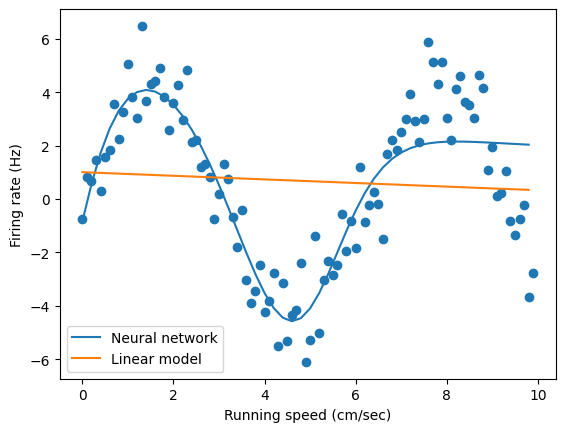

In [89]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

The non-linearity in the artifical neurons makes it possible to fit all sorts of function.

Here, the neural network is a better approximation of the underlying data. 

## Exercise

### Improve our neural network model

Our neural network is good but it is not perfect. 

How could you modify this model to make it fit the data more closely?

Have a go at trying to improve its predictions.

In [112]:
class NN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=15, bias=True)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=15, out_features=1, bias=True)
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.layer1(x)
        out = self.tanh(out)
        out = self.layer2(out)
        return out

In [113]:
nn_model = NN_model()

In [114]:
learning_rate=0.001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 60000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 10.915761947631836
Epoch: 1, Loss: 10.829551696777344
Epoch: 2, Loss: 10.747553825378418
Epoch: 3, Loss: 10.669563293457031
Epoch: 4, Loss: 10.595392227172852
Epoch: 5, Loss: 10.524857521057129
Epoch: 6, Loss: 10.457784652709961
Epoch: 7, Loss: 10.394011497497559
Epoch: 8, Loss: 10.333378791809082
Epoch: 9, Loss: 10.275739669799805
Epoch: 1000, Loss: 8.444541931152344
Epoch: 2000, Loss: 7.876040458679199
Epoch: 3000, Loss: 7.479679107666016
Epoch: 4000, Loss: 7.034619331359863
Epoch: 5000, Loss: 6.427706241607666
Epoch: 6000, Loss: 5.7121782302856445
Epoch: 7000, Loss: 5.01662540435791
Epoch: 8000, Loss: 4.434089183807373
Epoch: 9000, Loss: 3.987821340560913
Epoch: 10000, Loss: 3.6579394340515137
Epoch: 11000, Loss: 3.4145443439483643
Epoch: 12000, Loss: 3.2333130836486816
Epoch: 13000, Loss: 3.0978784561157227
Epoch: 14000, Loss: 2.9962143898010254
Epoch: 15000, Loss: 2.918872117996216
Epoch: 16000, Loss: 2.8578152656555176
Epoch: 17000, Loss: 2.8041436672210693
Epoch:

In [115]:
t_range = torch.arange(0,10,0.2).unsqueeze(1)
t_range.shape

torch.Size([50, 1])

In [107]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

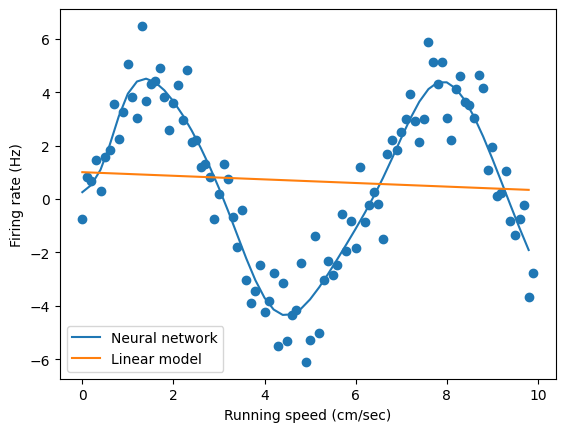

In [108]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

## Adding more hidden layers to create a deep neural network

**Deep neural networks** have several hidden layers.

* The output of the first layer have a shape similar to the activiation function.
* The next level can combine the inputs of the first layers to create more complex functions.


Text(0, 0.5, 'output')

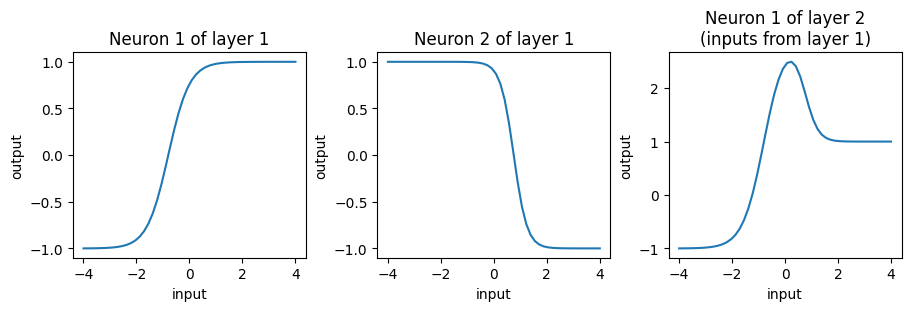

In [118]:
nrow=1
ncol=3
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3),layout='constrained')

XX = np.linspace(-4,4) # input
      
# 
w1=1.25
b1=1.0                
ax[0].plot(XX,np.tanh(w1*XX+b1))
ax[0].set_title("Neuron 1 of layer 1")
ax[0].set_xlabel("input")
ax[0].set_ylabel("output")

w2=-2
b2=1.5
ax[1].plot(XX,np.tanh(w2*XX+b2))
ax[1].set_title("Neuron 2 of layer 1")
ax[1].set_xlabel("input")
ax[1].set_ylabel("output")

w3=[2,1]
b3=2
ax[2].plot(XX,w3[0]*np.tanh(w1*XX+b1)+ w3[1]*np.tanh(w2*XX+b2))
ax[2].set_title("Neuron 1 of layer 2\n(inputs from layer 1)")
ax[2].set_xlabel("input")
ax[2].set_ylabel("output")

In [119]:
class DNN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=10, bias=True)
        self.layer2 = nn.Linear(in_features=10, out_features=10, bias=True)
        self.layer3 = nn.Linear(in_features=10, out_features=1, bias=True)
        self.tanh = nn.Tanh()
        
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.tanh(self.layer1(x))
        out = self.tanh(self.layer2(out))
        out = self.layer3(out)
        
        return out

In [120]:
dnn_model = DNN_model()

In [121]:
for name, p in dnn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.5656],
        [ 0.9519],
        [-0.8644],
        [ 0.1782],
        [ 0.4497],
        [ 0.7277],
        [-0.2182],
        [-0.9980],
        [ 0.5420],
        [ 0.2739]], requires_grad=True)
layer1.bias Parameter containing:
tensor([ 0.0478, -0.1899, -0.4845, -0.8605, -0.4237,  0.5104,  0.3978, -0.4544,
        -0.3024,  0.7056], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 0.1810,  0.1051,  0.0573, -0.2002, -0.0720,  0.2860,  0.3039, -0.0098,
          0.1650, -0.2375],
        [-0.0810, -0.1745,  0.1505,  0.0813, -0.0558,  0.2319,  0.1996,  0.0827,
         -0.1305,  0.1591],
        [-0.0568, -0.2170, -0.2192,  0.1874,  0.2388,  0.0998, -0.2042, -0.0340,
         -0.2558, -0.1055],
        [ 0.1892, -0.1015,  0.0413,  0.1421, -0.2120, -0.1053, -0.1258, -0.0308,
         -0.0956, -0.0144],
        [ 0.2248,  0.0970, -0.0967,  0.0569,  0.0518, -0.2650,  0.2532,  0.1243,
          0.1118, -0.2755],
        [ 0

In [122]:
print("Number of parameters:", sum(p.numel() for p in dnn_model.parameters()))

Number of parameters: 141


In [123]:
learning_rate=0.001
optimizer = optim.SGD(dnn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=dnn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 9.624743461608887
Epoch: 1, Loss: 9.620094299316406
Epoch: 2, Loss: 9.615513801574707
Epoch: 3, Loss: 9.611000061035156
Epoch: 4, Loss: 9.606550216674805
Epoch: 5, Loss: 9.602164268493652
Epoch: 6, Loss: 9.597840309143066
Epoch: 7, Loss: 9.593579292297363
Epoch: 8, Loss: 9.589381217956543
Epoch: 9, Loss: 9.58523941040039
Epoch: 1000, Loss: 8.820018768310547
Epoch: 2000, Loss: 7.916651725769043
Epoch: 3000, Loss: 6.437360763549805
Epoch: 4000, Loss: 4.6005401611328125
Epoch: 5000, Loss: 3.5731770992279053
Epoch: 6000, Loss: 3.0418686866760254
Epoch: 7000, Loss: 2.7643942832946777
Epoch: 8000, Loss: 2.655991315841675
Epoch: 9000, Loss: 2.6036853790283203
Epoch: 10000, Loss: 2.570239543914795
Epoch: 11000, Loss: 2.545386552810669
Epoch: 12000, Loss: 2.5243728160858154
Epoch: 13000, Loss: 2.5036916732788086
Epoch: 14000, Loss: 2.478895664215088
Epoch: 15000, Loss: 2.442991018295288
Epoch: 16000, Loss: 2.388669729232788
Epoch: 17000, Loss: 2.3117966651916504
Epoch: 18000, Lo

In [124]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)
dnn_yhat = dnn_model(t_range)

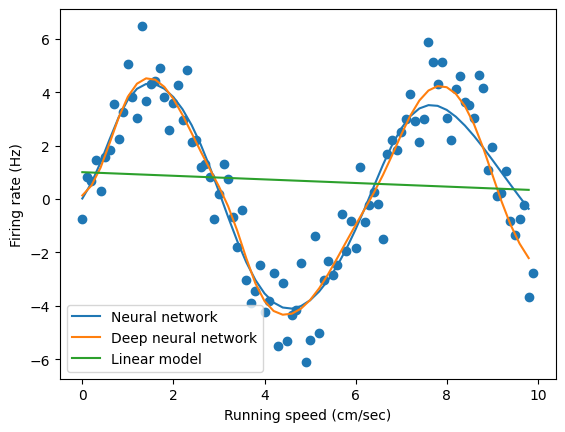

In [125]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),dnn_yhat.detach().numpy(),label="Deep neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

# Exercise (Homework)

Train a neural network that would predict the firing rate of a neuron based on speed and acceleration.

The X tensor will have to have a shape of (27304,2)


In [86]:
fn = "../data/animal_acceleration.npy"
acceleration = np.load(fn)

fn = "../data/animal_speed.npy"
speed = np.load(fn)

fn =  "../data/y_rate.npy"
rate = np.load(fn)

In [87]:
rate.shape

(27304,)

Text(0, 0.5, 'Firing rate (Hz)')

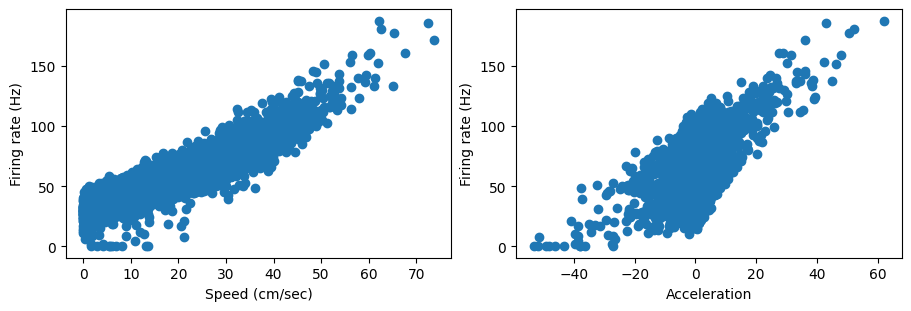

In [88]:
nrow=1
ncol=2
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3),layout='constrained')

ax[0].scatter(speed,rate)
ax[0].set_xlabel("Speed (cm/sec)")
ax[0].set_ylabel("Firing rate (Hz)")
ax[1].scatter(acceleration,rate)
ax[1].set_xlabel("Acceleration")
ax[1].set_ylabel("Firing rate (Hz)")